In [120]:
import pandas as pd
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as scp # for stats analysis, need specific module
import sklearn # for models, need specific module
import math
import random
import torch

In [3]:
occupancy_data_2023 = pd.read_csv("./data/occupancy/Daily_shelter_overnight_occupancy.csv", low_memory=False)
occupancy_data_2021 = pd.read_csv("./data/occupancy/daily-shelter-overnight-service-occupancy-capacity-2021.csv", low_memory=False)
occupancy_data_2022 = pd.read_csv("./data/occupancy/daily-shelter-overnight-service-occupancy-capacity-2022.csv", low_memory=False)

In [6]:
occupancy_data_2022.head()

,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,...,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS
0,1,22-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1103.0,SSHA North York West Hotel Program,1677 Wilson Ave,M3L 1A5,...,NaN,NaN,NaN,48.0,55.0,48.0,0.0,7.0,NaN,100.0
1,2,22-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1103.0,SSHA North York West Hotel Program,1677 Wilson Ave,M3L 1A5,...,NaN,NaN,NaN,9.0,15.0,9.0,0.0,6.0,NaN,100.0
2,3,22-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1103.0,SSHA North York West Hotel Program,1677 Wilson Ave,M3L 1A5,...,NaN,NaN,NaN,18.0,29.0,18.0,0.0,11.0,NaN,100.0
3,4,22-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051.0,COSTI Reception Centre,100 Lippincott St,M5S 2P1,...,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
4,5,22-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114.0,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,...,NaN,NaN,NaN,107.0,113.0,107.0,0.0,6.0,NaN,100.0


In [7]:
occupancy_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49478 entries, 0 to 49477
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     49478 non-null  int64  
 1   OCCUPANCY_DATE          49478 non-null  object 
 2   ORGANIZATION_ID         49478 non-null  int64  
 3   ORGANIZATION_NAME       49478 non-null  object 
 4   SHELTER_ID              49478 non-null  int64  
 5   SHELTER_GROUP           49262 non-null  object 
 6   LOCATION_ID             49369 non-null  float64
 7   LOCATION_NAME           49056 non-null  object 
 8   LOCATION_ADDRESS        48144 non-null  object 
 9   LOCATION_POSTAL_CODE    48144 non-null  object 
 10  LOCATION_CITY           48144 non-null  object 
 11  LOCATION_PROVINCE       48144 non-null  object 
 12  PROGRAM_ID              49478 non-null  int64  
 13  PROGRAM_NAME            49478 non-null  object 
 14  SECTOR                  49478 non-null

In [38]:
def col_info(df, cols):
    for col in cols:
        print("---------------------------------------------------------------------")
        print(f"count by {col}: \n{df.groupby(col, dropna=False)['SHELTER_ID'].nunique()}")

In [39]:
cols = [
    "LOCATION_CITY",
    "LOCATION_PROVINCE",
    "PROGRAM_NAME",
    "PROGRAM_MODEL",
    "SECTOR",
    "OVERNIGHT_SERVICE_TYPE",
    "CAPACITY_TYPE"
]

In [40]:
col_info(occupancy_data_2023, cols)

---------------------------------------------------------------------
count by LOCATION_CITY: 
LOCATION_CITY
Etobicoke       2
North York      6
Scarborough     7
Toronto        60
Vaughan         1
NaN             5
Name: SHELTER_ID, dtype: int64
---------------------------------------------------------------------
count by LOCATION_PROVINCE: 
LOCATION_PROVINCE
ON     63
NaN     5
Name: SHELTER_ID, dtype: int64
---------------------------------------------------------------------
count by PROGRAM_NAME: 
PROGRAM_NAME
545 Lake Shore Blvd W. Couples                           1
545 Lake Shore Blvd W. Men                               1
545 Lake Shore Blvd W. Women                             1
545 Lakeshore Blvd W. Men Respite Program Lower Level    1
Birkdale Residence - Bedded Program                      1
                                                        ..
Youth without Shelter Emergency Shelter Program          1
Youth without Shelter Stay In School Program             1
Youth

In [41]:
col_info(occupancy_data_2022, cols)

---------------------------------------------------------------------
count by LOCATION_CITY: 
LOCATION_CITY
Etobicoke       2
North York      6
Scarborough     8
Toronto        62
Vaughan         1
NaN             4
Name: SHELTER_ID, dtype: int64
---------------------------------------------------------------------
count by LOCATION_PROVINCE: 
LOCATION_PROVINCE
ON     65
NaN     4
Name: SHELTER_ID, dtype: int64
---------------------------------------------------------------------
count by PROGRAM_NAME: 
PROGRAM_NAME
545 Lake Shore Blvd W. Couples                     1
545 Lake Shore Blvd W. Men                         1
545 Lake Shore Blvd W. Men Lower Level             1
545 Lake Shore Blvd W. Women                       1
Birkdale Residence - Bedded Program                1
                                                  ..
YWCA Davenport - Youth                             1
Youth without Shelter Emergency Shelter Program    1
Youth without Shelter Stay In School Program       1


In [42]:
col_info(occupancy_data_2021, cols)

---------------------------------------------------------------------
count by LOCATION_CITY: 
LOCATION_CITY
Etobicoke       2
North York      6
North York      2
Scarborough     8
Toronto        61
Vaughan         1
NaN             8
Name: SHELTER_ID, dtype: int64
---------------------------------------------------------------------
count by LOCATION_PROVINCE: 
LOCATION_PROVINCE
ON     64
NaN     8
Name: SHELTER_ID, dtype: int64
---------------------------------------------------------------------
count by PROGRAM_NAME: 
PROGRAM_NAME
545 Lake Shore Blvd W. Couples                             1
545 Lake Shore Blvd W. Men                                 1
545 Lake Shore Blvd W. Men Lower Level                     1
545 Lake Shore Blvd W. Women                               1
Birkdale North York West Hotel Program - Family Program    1
                                                          ..
Youth without Shelter Emergency Shelter Program            1
Youth without Shelter Stay In Sc

In [46]:
def summary(df, cols):
    print("-------------------------------Total---------------------------------")
    print(f"Occupancy rate (rooms): {df['OCCUPANCY_RATE_ROOMS'].mean()}")
    print(f"Occupancy rate (beds): {df['OCCUPANCY_RATE_BEDS'].mean()}")
    for col in cols:
        print(f"------------------------------By {col}-------------------------------")
        print(f"Occupancy rate (rooms): \n{df.groupby(col, dropna=False)['OCCUPANCY_RATE_ROOMS'].mean()}")
        print(f"Occupancy rate (beds): \n{df.groupby(col, dropna=False)['OCCUPANCY_RATE_BEDS'].mean()}")

In [47]:
rate_cols = [
    "LOCATION_CITY",
    "PROGRAM_MODEL",
    "SECTOR",
    "OVERNIGHT_SERVICE_TYPE",
]

In [48]:
summary(occupancy_data_2023, rate_cols)

-------------------------------Total---------------------------------
Occupancy rate (rooms): 99.0019051094896
Occupancy rate (beds): 97.56938612134905
------------------------------By LOCATION_CITY-------------------------------
Occupancy rate (rooms): 
LOCATION_CITY
Etobicoke      99.997553
North York     99.410004
Scarborough    99.959348
Toronto        98.681121
Vaughan        97.246312
NaN            99.642704
Name: OCCUPANCY_RATE_ROOMS, dtype: float64
Occupancy rate (beds): 
LOCATION_CITY
Etobicoke      92.036330
North York     99.800652
Scarborough    98.431294
Toronto        97.530376
Vaughan              NaN
NaN            99.321815
Name: OCCUPANCY_RATE_BEDS, dtype: float64
------------------------------By PROGRAM_MODEL-------------------------------
Occupancy rate (rooms): 
PROGRAM_MODEL
Emergency       98.974316
Transitional    99.376418
Name: OCCUPANCY_RATE_ROOMS, dtype: float64
Occupancy rate (beds): 
PROGRAM_MODEL
Emergency       98.683226
Transitional    94.090069
Name: 

In [50]:
summary(occupancy_data_2022, rate_cols)

-------------------------------Total---------------------------------
Occupancy rate (rooms): 97.59864514649374
Occupancy rate (beds): 96.76735212410692
------------------------------By LOCATION_CITY-------------------------------
Occupancy rate (rooms): 
LOCATION_CITY
Etobicoke      100.000000
North York      99.306315
Scarborough     99.854086
Toronto         98.397505
Vaughan         97.296603
NaN             75.534971
Name: OCCUPANCY_RATE_ROOMS, dtype: float64
Occupancy rate (beds): 
LOCATION_CITY
Etobicoke      96.513164
North York     99.396979
Scarborough    98.830238
Toronto        96.533289
Vaughan              NaN
NaN            98.197192
Name: OCCUPANCY_RATE_BEDS, dtype: float64
------------------------------By PROGRAM_MODEL-------------------------------
Occupancy rate (rooms): 
PROGRAM_MODEL
Emergency       97.598805
Transitional    97.596243
Name: OCCUPANCY_RATE_ROOMS, dtype: float64
Occupancy rate (beds): 
PROGRAM_MODEL
Emergency       98.256310
Transitional    92.275651

In [51]:
summary(occupancy_data_2021, rate_cols)

-------------------------------Total---------------------------------
Occupancy rate (rooms): 93.40864168239439
Occupancy rate (beds): 92.78848482978007
------------------------------By LOCATION_CITY-------------------------------
Occupancy rate (rooms): 
LOCATION_CITY
Etobicoke      99.937260
North York     96.202558
North York     96.591721
Scarborough    98.089165
Toronto        95.181448
Vaughan        97.372301
NaN            42.747987
Name: OCCUPANCY_RATE_ROOMS, dtype: float64
Occupancy rate (beds): 
LOCATION_CITY
Etobicoke      81.895808
North York     97.470391
North York           NaN
Scarborough    93.582791
Toronto        92.974690
Vaughan              NaN
NaN            89.491058
Name: OCCUPANCY_RATE_BEDS, dtype: float64
------------------------------By PROGRAM_MODEL-------------------------------
Occupancy rate (rooms): 
PROGRAM_MODEL
Emergency       93.862988
Transitional    82.320712
NaN                   NaN
Name: OCCUPANCY_RATE_ROOMS, dtype: float64
Occupancy rate (bed

In [54]:
occupancy_data_2021["PROGRAM_MODEL"].fillna(value="Neither").unique()

array(['Emergency', 'Transitional', 'Neither'], dtype=object)

In [228]:
def plot_occupancy_over_time(df, col, fill_na = "Neither", beds=True):
    df_filled = df.copy()
    df_filled[col] = df_filled[col].fillna(value=fill_na)
    vals = df_filled[col].unique()
    legend = []
#   x = [i for i in range(282)]
    for val in vals:
        if beds:
            y = np.nan_to_num(np.asarray(df_filled[df_filled[col]==val].groupby("OCCUPANCY_DATE")['OCCUPANCY_RATE_BEDS'].mean()))
        else:
            y = np.nan_to_num(np.asarray(df_filled[df_filled[col]==val].groupby("OCCUPANCY_DATE")['OCCUPANCY_RATE_ROOMS'].mean()))
            # x = (np.asarray([y.mean()]*y.shape[0])).tolist()
        # p_val = round(scp.kstest(x,y)[1], 2)
        x = (np.asarray(list(range(y.shape[0]))).astype(np.float32)/(1.0*y.shape[0]))
        r = round(np.corrcoef(x, y)[0, 1], 3)
        y = y.tolist()
        x = x.tolist()
        plt.plot(y)
        legend.append(val+f" corr={r}")
    plt.xlabel("Days")
    if beds:
        plt.ylabel(f"Daily Bed Occupancy rate by {col}")
    else:
        plt.ylabel(f"Daily Room Occupancy rate by {col}")
    plt.legend(legend, loc="best")
    plt.savefig("./fig.jpg", dpi=600)

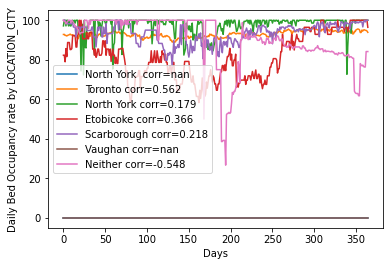

In [229]:
plot_occupancy_over_time(occupancy_data_2021, "LOCATION_CITY")

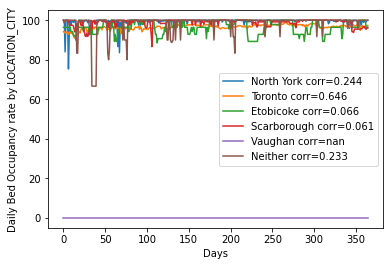

In [230]:
plot_occupancy_over_time(occupancy_data_2022, "LOCATION_CITY")

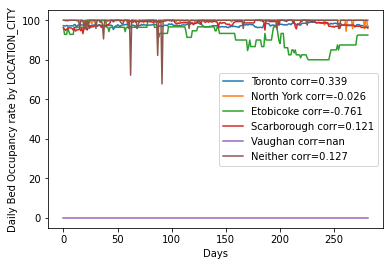

In [231]:
plot_occupancy_over_time(occupancy_data_2023, "LOCATION_CITY")

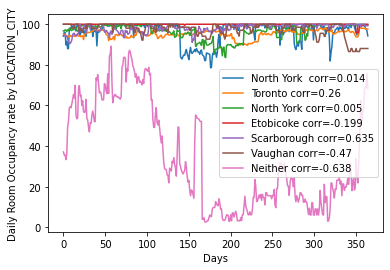

In [244]:
plot_occupancy_over_time(occupancy_data_2021, "LOCATION_CITY", beds=False)

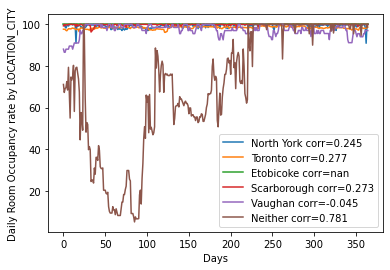

In [245]:
plot_occupancy_over_time(occupancy_data_2022, "LOCATION_CITY", beds=False)

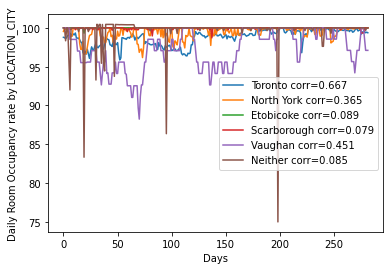

In [246]:
plot_occupancy_over_time(occupancy_data_2023, "LOCATION_CITY", beds=False)

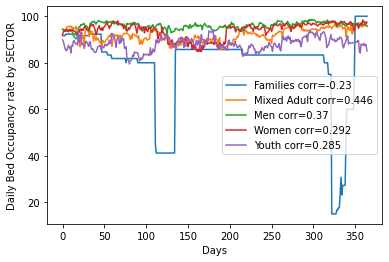

In [232]:
plot_occupancy_over_time(occupancy_data_2021, "SECTOR")

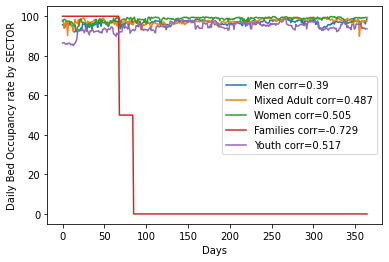

In [233]:
plot_occupancy_over_time(occupancy_data_2022, "SECTOR")

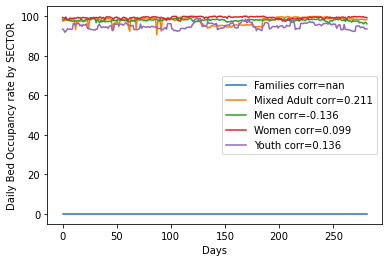

In [234]:
plot_occupancy_over_time(occupancy_data_2023, "SECTOR")

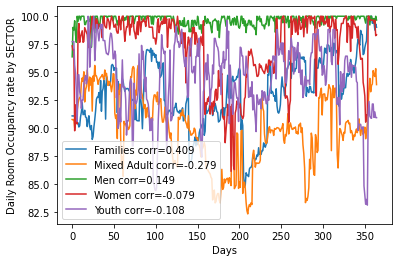

In [235]:
plot_occupancy_over_time(occupancy_data_2021, "SECTOR", beds=False)

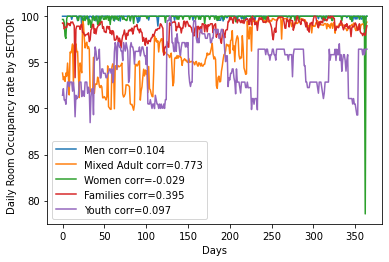

In [236]:
plot_occupancy_over_time(occupancy_data_2022, "SECTOR", beds=False)

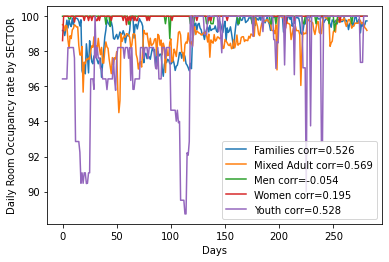

In [237]:
plot_occupancy_over_time(occupancy_data_2023, "SECTOR", beds=False)

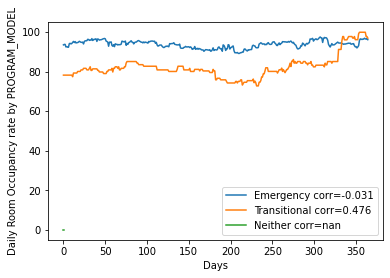

In [238]:
plot_occupancy_over_time(occupancy_data_2021, "PROGRAM_MODEL", beds=False)

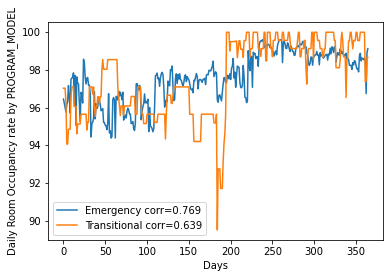

In [239]:
plot_occupancy_over_time(occupancy_data_2022, "PROGRAM_MODEL", beds=False)

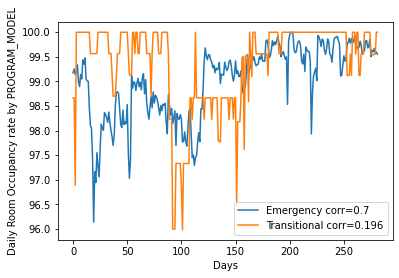

In [240]:
plot_occupancy_over_time(occupancy_data_2023, "PROGRAM_MODEL", beds=False)

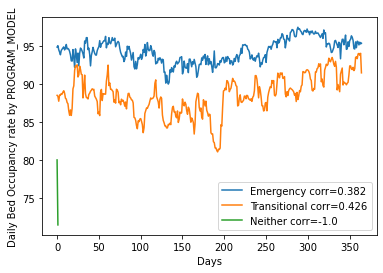

In [241]:
plot_occupancy_over_time(occupancy_data_2021, "PROGRAM_MODEL")

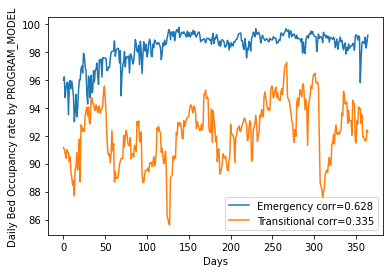

In [242]:
plot_occupancy_over_time(occupancy_data_2022, "PROGRAM_MODEL")

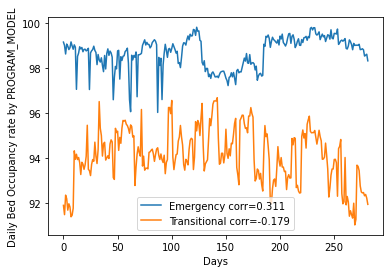

In [243]:
plot_occupancy_over_time(occupancy_data_2023, "PROGRAM_MODEL")

In [205]:
mod2 = smf.ols(formula='OCCUPANCY_RATE_ROOMS ~ LOCATION_CITY', data=occupancy_data_2021)
mod2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     OCCUPANCY_RATE_ROOMS   R-squared:                       0.015
Model:                              OLS   Adj. R-squared:                  0.015
Method:                   Least Squares   F-statistic:                     53.07
Date:                  Thu, 12 Oct 2023   Prob (F-statistic):           7.34e-55
Time:                          17:40:45   Log-Likelihood:                -64535.
No. Observations:                 17646   AIC:                         1.291e+05
Df Residuals:                     17640   BIC:                         1.291e+05
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       99.9373      0.491    203.582      0.000      98.975     100.899
LOCATION_CITY[T.North York]     -3.7347      0.523     -7.136      0.000      -4.760      -2.709
LOCATION_CITY[T.North York ]    -3.3455      0.535     -6.251      0.000      -4.395      -2.297
LOCATION_CITY[T.Scarborough]    -1.8481      0.531     -3.481      0.000      -2.889      -0.808
LOCATION_CITY[T.Toronto]        -4.7558      0.500     -9.518      0.000      -5.735      -3.776
LOCATION_CITY[T.Vaughan]        -2.5650      0.694     -3.695      0.000      -3.926      -1.204
==============================================================================
Omnibus:                    13110.315   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214953.841
Skew:                          -3.533   Prob(JB):                         0.00
Kurtosis:                      18.570   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
mod2 = smf.ols(formula='OCCUPANCY_RATE_ROOMS ~ LOCATION_CITY', data=occupancy_data_2022)
mod2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     OCCUPANCY_RATE_ROOMS   R-squared:                       0.019
Model:                              OLS   Adj. R-squared:                  0.019
Method:                   Least Squares   F-statistic:                     81.60
Date:                  Thu, 12 Oct 2023   Prob (F-statistic):           1.04e-68
Time:                          17:13:54   Log-Likelihood:                -47380.
No. Observations:                 16570   AIC:                         9.477e+04
Df Residuals:                     16565   BIC:                         9.481e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      100.0000      0.221    452.384      0.000      99.567     100.433
LOCATION_CITY[T.North York]     -0.6937      0.232     -2.994      0.003      -1.148      -0.240
LOCATION_CITY[T.Scarborough]    -0.1459      0.244     -0.598      0.550      -0.624       0.332
LOCATION_CITY[T.Toronto]        -1.6025      0.225     -7.126      0.000      -2.043      -1.162
LOCATION_CITY[T.Vaughan]        -2.7034      0.313     -8.648      0.000      -3.316      -2.091
==============================================================================
Omnibus:                    18721.151   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1619509.541
Skew:                          -5.970   Prob(JB):                         0.00
Kurtosis:                      49.938   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
mod2 = smf.ols(formula='OCCUPANCY_RATE_ROOMS ~ LOCATION_CITY', data=occupancy_data_2023)
mod2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     OCCUPANCY_RATE_ROOMS   R-squared:                       0.021
Model:                              OLS   Adj. R-squared:                  0.021
Method:                   Least Squares   F-statistic:                     63.48
Date:                  Thu, 12 Oct 2023   Prob (F-statistic):           3.54e-53
Time:                          17:14:12   Log-Likelihood:                -31957.
No. Observations:                 11779   AIC:                         6.392e+04
Df Residuals:                     11774   BIC:                         6.396e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       99.9976      0.217    460.253      0.000      99.572     100.423
LOCATION_CITY[T.North York]     -0.5875      0.228     -2.577      0.010      -1.034      -0.141
LOCATION_CITY[T.Scarborough]    -0.0382      0.243     -0.157      0.875      -0.515       0.438
LOCATION_CITY[T.Toronto]        -1.3164      0.221     -5.946      0.000      -1.750      -0.882
LOCATION_CITY[T.Vaughan]        -2.7512      0.307     -8.954      0.000      -3.354      -2.149
==============================================================================
Omnibus:                    14198.176   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2007991.443
Skew:                          -6.470   Prob(JB):                         0.00
Kurtosis:                      65.641   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""